In [208]:
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt


wine_data  = load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [209]:
df['Target'] = wine_data.target

In [210]:
df.isnull().sum()
# no null values

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Target                          0
dtype: int64

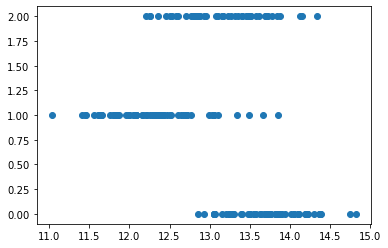

In [211]:
plt.plot(df.alcohol, wine_data.target, 'o')
plt.show()
# sort wines according to alcohol by linear regression

In [212]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(df.alcohol, wine_data.target, test_size=0.33, random_state=1)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [213]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [214]:
Y_pred = classifier.predict(X_test)

In [215]:
from sklearn.metrics import accuracy_score
Y_predicted = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_predicted)
accuracy


0.8305084745762712

In [216]:
classifier.predict([[0]])[0]

# classes 0, 1, 2

2